<a href="https://colab.research.google.com/github/joynaomi81/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
"""
Project: Diabetes Prediction
Author: Olusanya Joy
Date: 2025-09-02
Description: This script analyzes diabetes data, performs preprocessing,
             visualizes patterns, trains machine learning models,
             and evaluates their performance using a neural network built with TensorFlow/Keras.
Dependencies:
    - pandas
    - numpy
    - scikit-learn
    - tensorflow
Usage:
    1. Install required libraries: pip install -r requirements.txt
    2. Run this script: python diabetes_prediction.py
"""


'\nProject: Diabetes Prediction\nAuthor: Olusanya Joy\nDate: 2025-09-02\nDescription: This script analyzes diabetes data, performs preprocessing, \n             visualizes patterns, trains machine learning models, \n             and evaluates their performance using a neural network built with TensorFlow/Keras.\nDependencies: \n    - pandas\n    - numpy\n    - scikit-learn\n    - tensorflow\nUsage:\n    1. Install required libraries: pip install -r requirements.txt\n    2. Run this script: python diabetes_prediction.py\n'

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [27]:
df=pd.read_csv('/content/drive/MyDrive/diabetes (1).csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
df.shape

(768, 9)

In [29]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [33]:
df.duplicated().sum()

np.int64(0)

Distribution of Each Feature

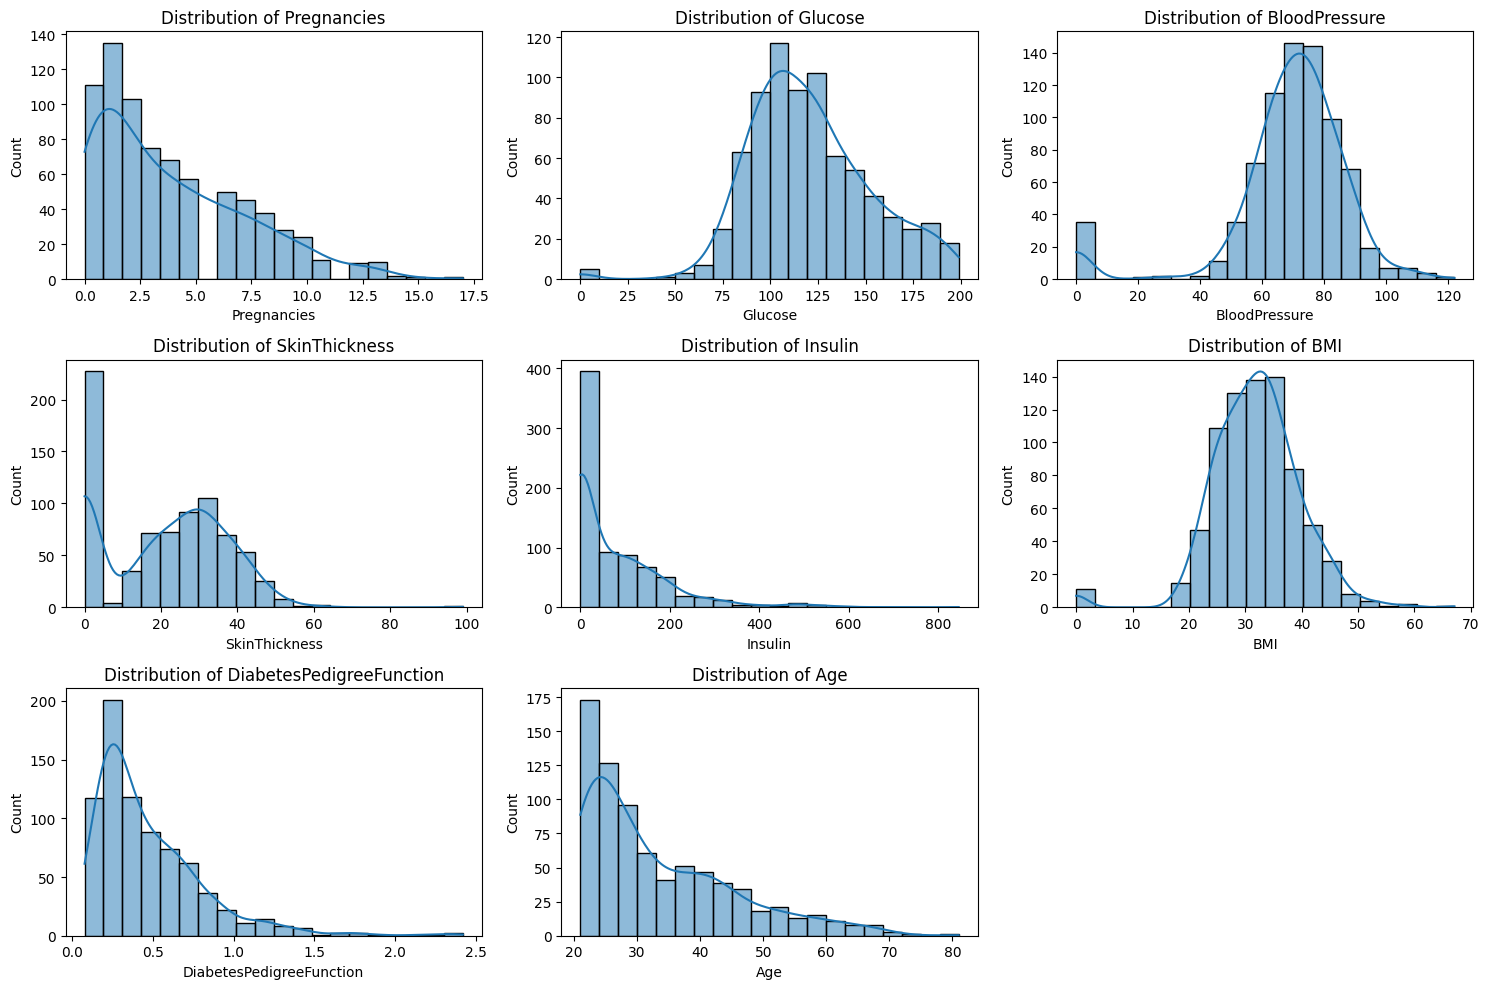

In [34]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(15,10))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Count of Diabetic vs Non-Diabetic

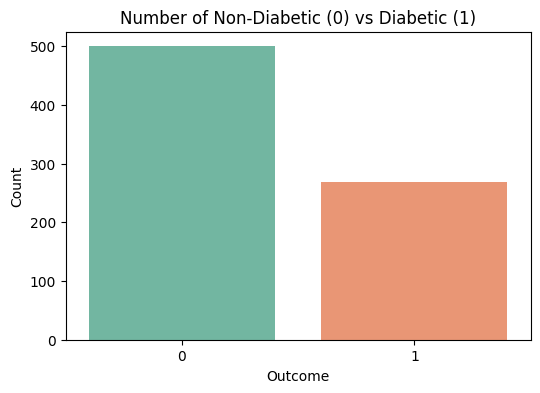

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title("Number of Non-Diabetic (0) vs Diabetic (1)")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

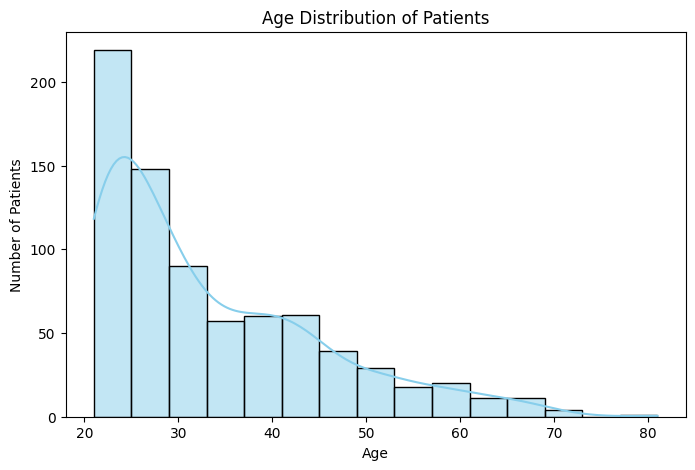

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()

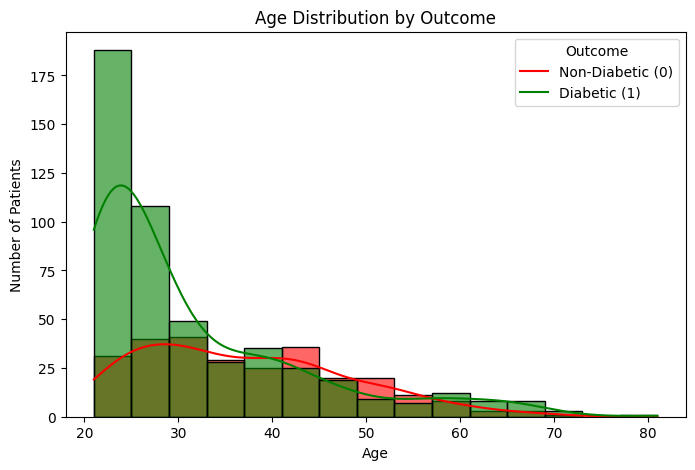

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Outcome', bins=15, kde=True, palette=['green','red'], alpha=0.6)
plt.title("Age Distribution by Outcome")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.legend(title='Outcome', labels=['Non-Diabetic (0)','Diabetic (1)'])
plt.show()


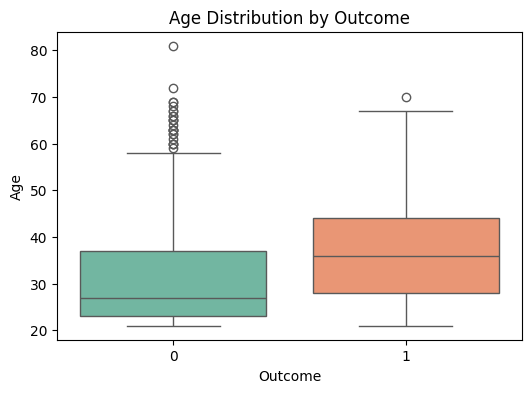

In [38]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Outcome', y='Age', data=df, palette='Set2')
plt.title("Age Distribution by Outcome")
plt.xlabel("Outcome")
plt.ylabel("Age")
plt.show()

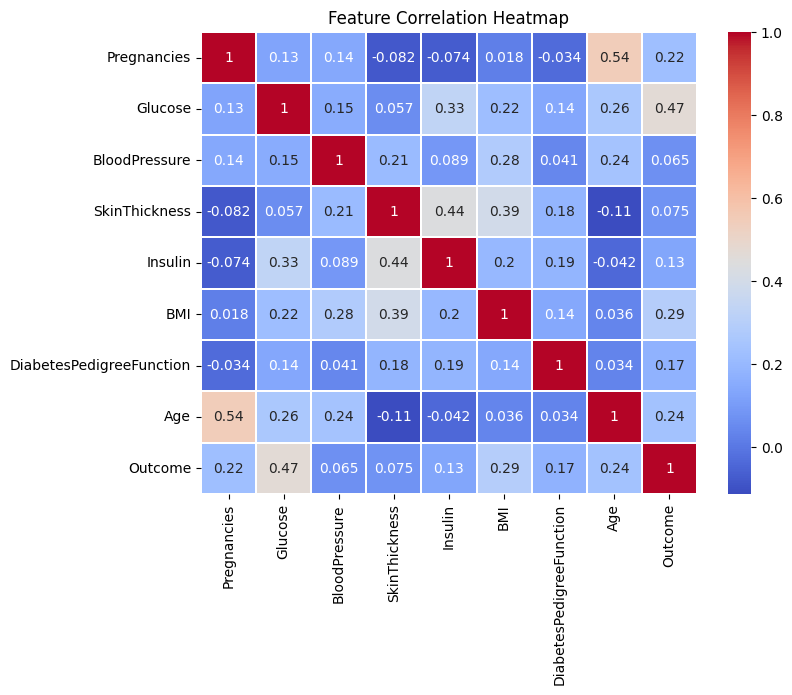

In [42]:
 #Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2g', linewidths=0.2)
plt.title('Feature Correlation Heatmap', fontsize=12)
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [45]:
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [46]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=8,
    verbose=1
)


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7163 - loss: 0.6019 - val_accuracy: 0.7317 - val_loss: 0.5967
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7572 - loss: 0.5609 - val_accuracy: 0.7154 - val_loss: 0.5595
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7130 - loss: 0.5571 - val_accuracy: 0.7236 - val_loss: 0.5384
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7940 - loss: 0.4751 - val_accuracy: 0.7398 - val_loss: 0.5236
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7726 - loss: 0.4825 - val_accuracy: 0.7561 - val_loss: 0.5094
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7629 - loss: 0.4659 - val_accuracy: 0.7561 - val_loss: 0.5010
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7844 - loss: 0.4395 - val_accuracy: 0.7642 - val_loss: 0.4942
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7760 - loss: 0.4532 - val_accuracy: 0.7642 - val_loss:

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



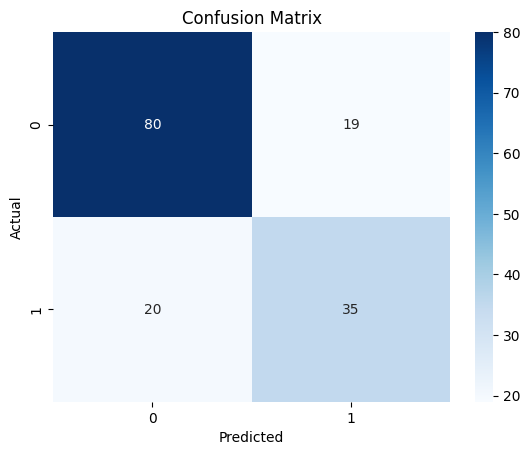

In [47]:
# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [48]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC:", roc_auc)


ROC-AUC: 0.7816345270890726


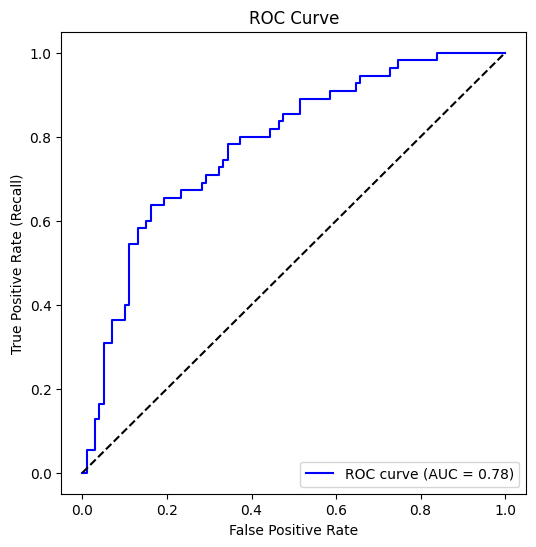

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})', color='blue')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


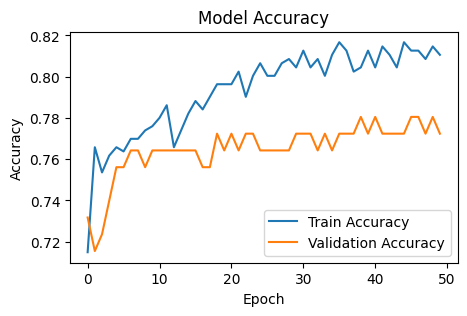

In [52]:
#Visualize training history

plt.figure(figsize=(5,3))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()